# **Project: Loan Predictions**

Contents

1.   Data Information
2.   Goal of the Project
3.   Loading Data
4.   Understanding Data
5.   Exploratory Data Analysis
     *   CountPlot
     *   Distribution Plot
     *   Correlation
5.   Feature Engineering
     *   Handle Missing Values
     *   Log Transformation
     *   Label Encoder
6.   Machine Learning Models
     *  Supervised Learning
        -   Logistic Regresion
        -   Naive Models
        -   KNearest Neighbours
        -   Support Vector Machine
        -   Decision Tree
        -   Random Forest

7.  Results and conclusion
8.  References





# Information about  Data
The description for each variable is shown below.

    Loan_ID → Unique Loan ID

    Gender → Male/ Female

    Married → Applicant married (Y/N)

    Dependents → Number of dependents

    Education → Applicant Education (Graduate/ Under Graduate)

    Self_Employed → Self employed (Y/N)

    ApplicantIncome → Applicant income

    CoapplicantIncome → Coapplicant income

    LoanAmount → Loan amount in thousands

    Loan_Amount_Term → Term of loan in months

    Credit_History → credit history meets guidelines

    Property_Area → Urban/ Semi Urban/ Rural

    Loan_Status → Loan approved (Y/N)


# 2. Goal of the Project

This notebook  is designed to solve binary classification problems, to be exact, `Loan predictions`. In others words this notebook wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others

# 3.  Loading Data

## 3.1 Import Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # Seaborn is a library for making statistical graphics in Python.
%matplotlib inline

## 3.2 Load Data

In [ ]:
datatrain = pd.read_csv("Training Dataset.csv")
datatest = pd.read_csv("Test Dataset.csv")

# 4. Understanding Data

In [ ]:
# Shape of data
# ==============================================================================
print(f"The shape of training data is: {datatrain.shape}")
print(f"The shape of testing data is: {datatest.shape}")

The shape of training data is: (614, 13)
The shape of testing data is: (367, 12)


In [ ]:
# View the first 5  elements of data
# ==============================================================================
datatrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Info of data
# ==============================================================================
datatrain.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Knowking the type of data
# ==============================================================================
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Dropping the Column "Loan_ID"
# ==============================================================================
for df  in [datatrain, datatest]:
  df.drop("Loan_ID", axis = 1, inplace= True)

In [ ]:
# Type of variables
# ==============================================================================
print("*"*23, "Categorical Variables", "*"*23)
cat_var = datatrain.dtypes[datatrain.dtypes == "object"].index
print(cat_var, len(cat_var))
print("*"*23, "Numerical Variables", "*"*23)
num_var = datatrain.dtypes[datatrain.dtypes != "object"].index
print(num_var, len(num_var))

*********************** Categorical Variables ***********************
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object') 7
*********************** Numerical Variables ***********************
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object') 5


In [ ]:
# Missing values
# ==============================================================================
datatrain.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

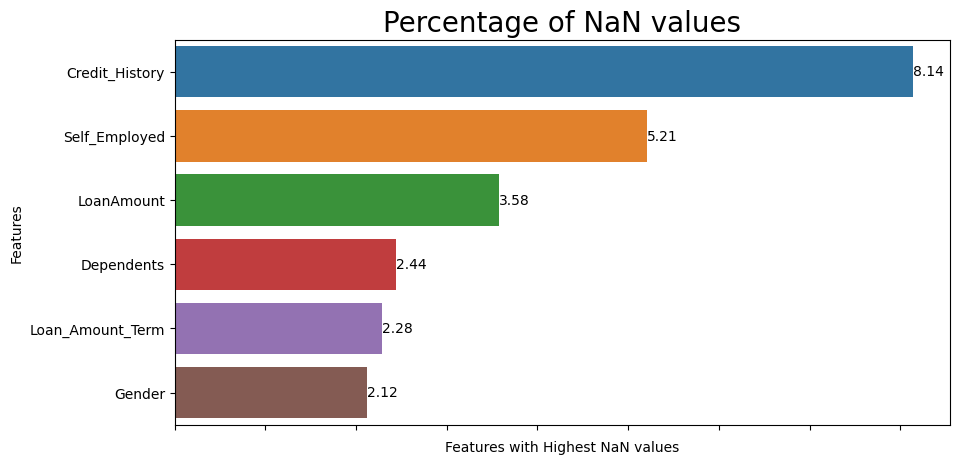

In [ ]:
# Percentage of null values
# ==============================================================================
nan_p = []
columns = datatrain.columns
for i in columns:
    prcnt = len(datatrain[i][datatrain[i].isna() == True]) / len(datatrain[i])*100
    nan_p.append(round(prcnt,2))

Nan_values = pd.DataFrame({'Features' : columns, 'NaN_Prcnt': nan_p}).sort_values(by = 'NaN_Prcnt', ascending = False)
Nan_values = Nan_values[Nan_values.NaN_Prcnt > 1]



fig , ax = plt.subplots(figsize=(10, 5))
plt.title('Percentage of NaN values', size = 20)

sns.barplot(x = Nan_values.NaN_Prcnt, y = Nan_values.Features)
plt.xlabel("Features with Highest NaN values")
#to create label on the graphs
ax.set(xticklabels=[])
for i in ax.containers:
    ax.bar_label(i) #bar label
plt.show()

Summary of Data Preprocesing
*   We have dropped the column "Loan_ID".
*   The datatrain contains 614 observations and 12 variables.
*   The datatrain contains 5 numerical variables, whose names are ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
*   The datatrain contains 7 categorical variables, whose names are ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
*  For this notebook our output is `Loan Status`
*   The data contains some null values.




# 5. Exploratory Data Analisis

## Univariate Analysis

It is the simplest form of analyzing data where we examine each variable individually.

*   For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable.
*   For numerical features, probability density plots can be used to look at the distribution of the variable.

###  Count plot



********************** Gender **********************
Male      81.36
Female    18.64
Name: Gender, dtype: float64
********************** Married **********************
Yes    65.14
No     34.86
Name: Married, dtype: float64
********************** Dependents **********************
0     57.60
1     17.03
2     16.86
3+     8.51
Name: Dependents, dtype: float64
********************** Education **********************
Graduate        78.18
Not Graduate    21.82
Name: Education, dtype: float64
********************** Self_Employed **********************
No     85.91
Yes    14.09
Name: Self_Employed, dtype: float64
********************** Property_Area **********************
Semiurban    37.95
Urban        32.90
Rural        29.15
Name: Property_Area, dtype: float64
********************** Loan_Status **********************
Y    68.73
N    31.27
Name: Loan_Status, dtype: float64


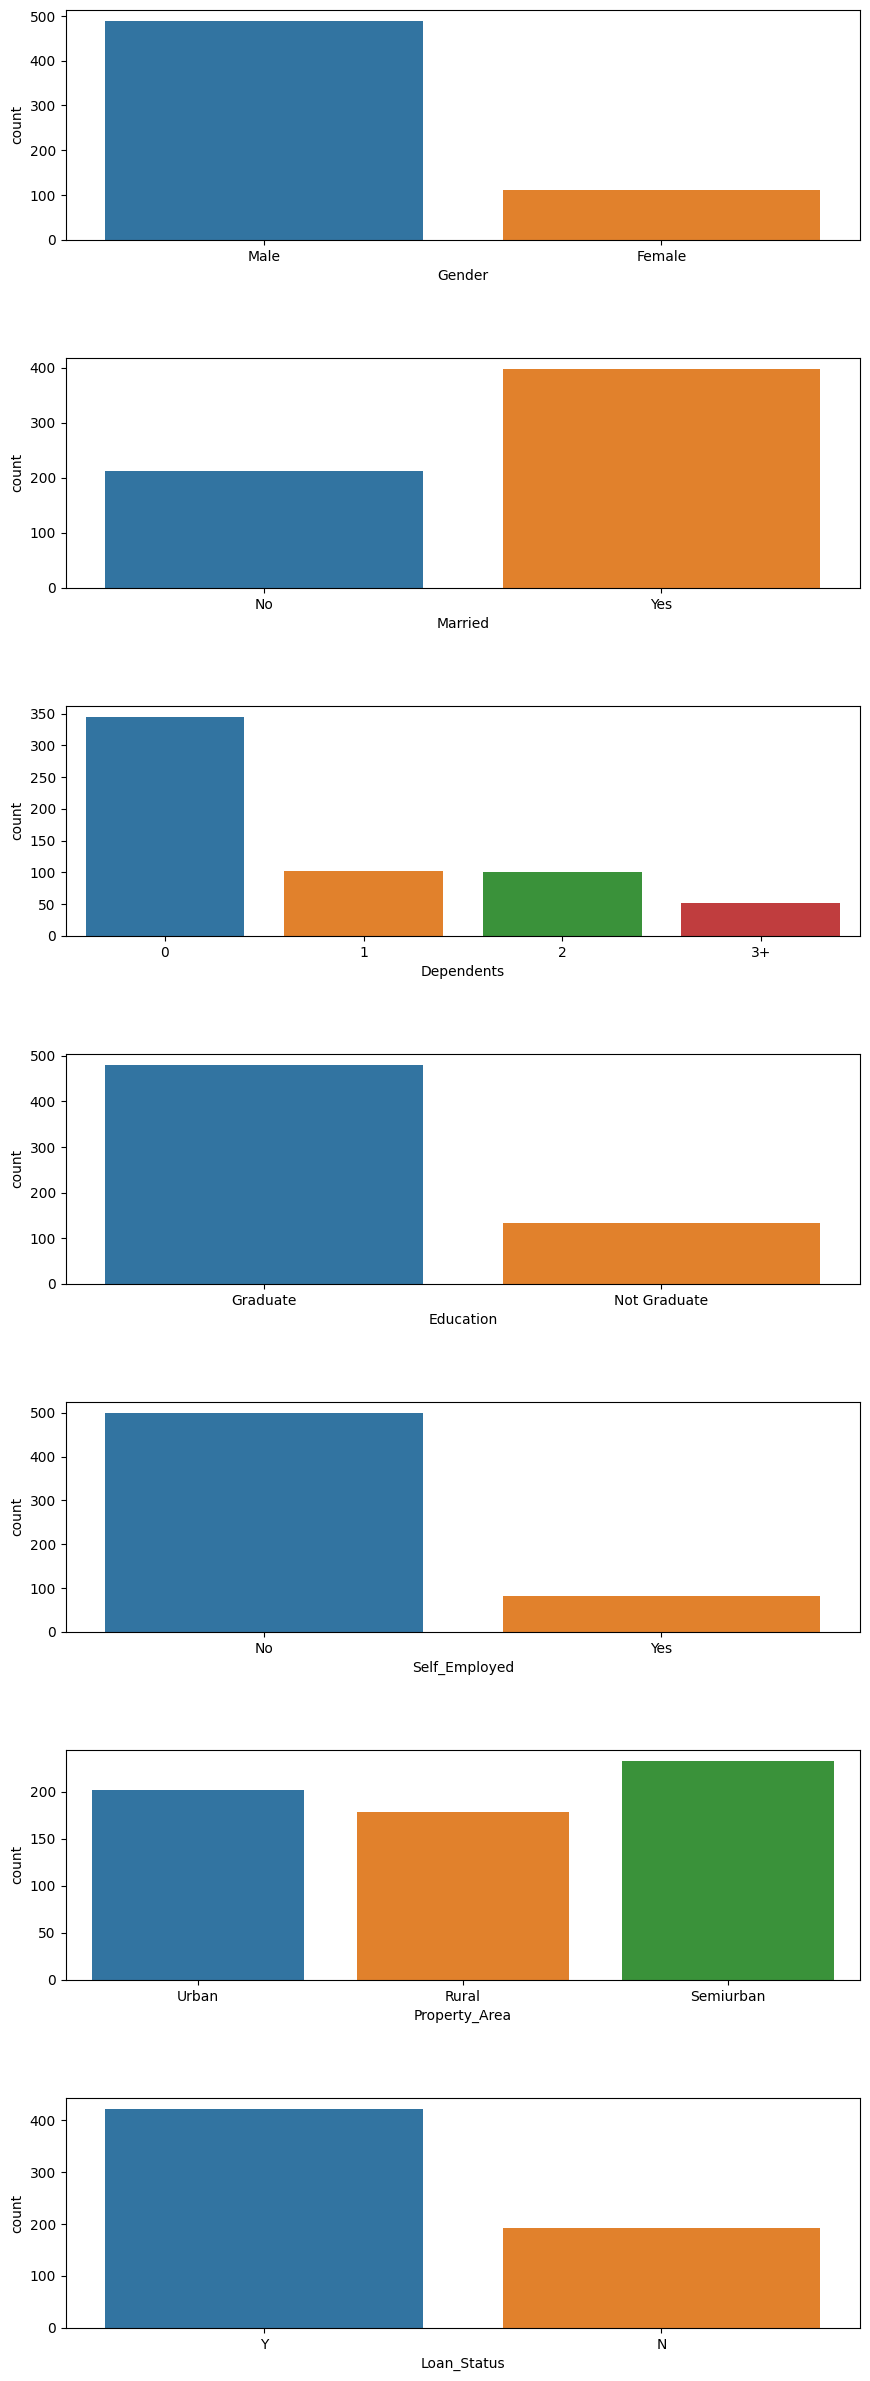

In [ ]:
for i in cat_var:
  print("*"*22,i , "*"*22)
  print(round(datatrain[i].value_counts(normalize = True)*100,2))

fig,axes = plt.subplots(7,1,figsize=(10,25))
for idx, i in enumerate(cat_var):
  fig.tight_layout(pad=5.0)
  sns.countplot(x = i, data = datatrain, ax=axes[idx])
  plt.xlabel(str(i))



### Distribution plot

********************** ApplicantIncome **********************
It has a skew 6.54 and a Kurtosis 60.54
********************** CoapplicantIncome **********************
It has a skew 7.49 and a Kurtosis 84.96
********************** LoanAmount **********************
It has a skew 2.68 and a Kurtosis 10.4
********************** Loan_Amount_Term **********************
It has a skew -2.36 and a Kurtosis 6.67
********************** Credit_History **********************
It has a skew -1.88 and a Kurtosis 1.55


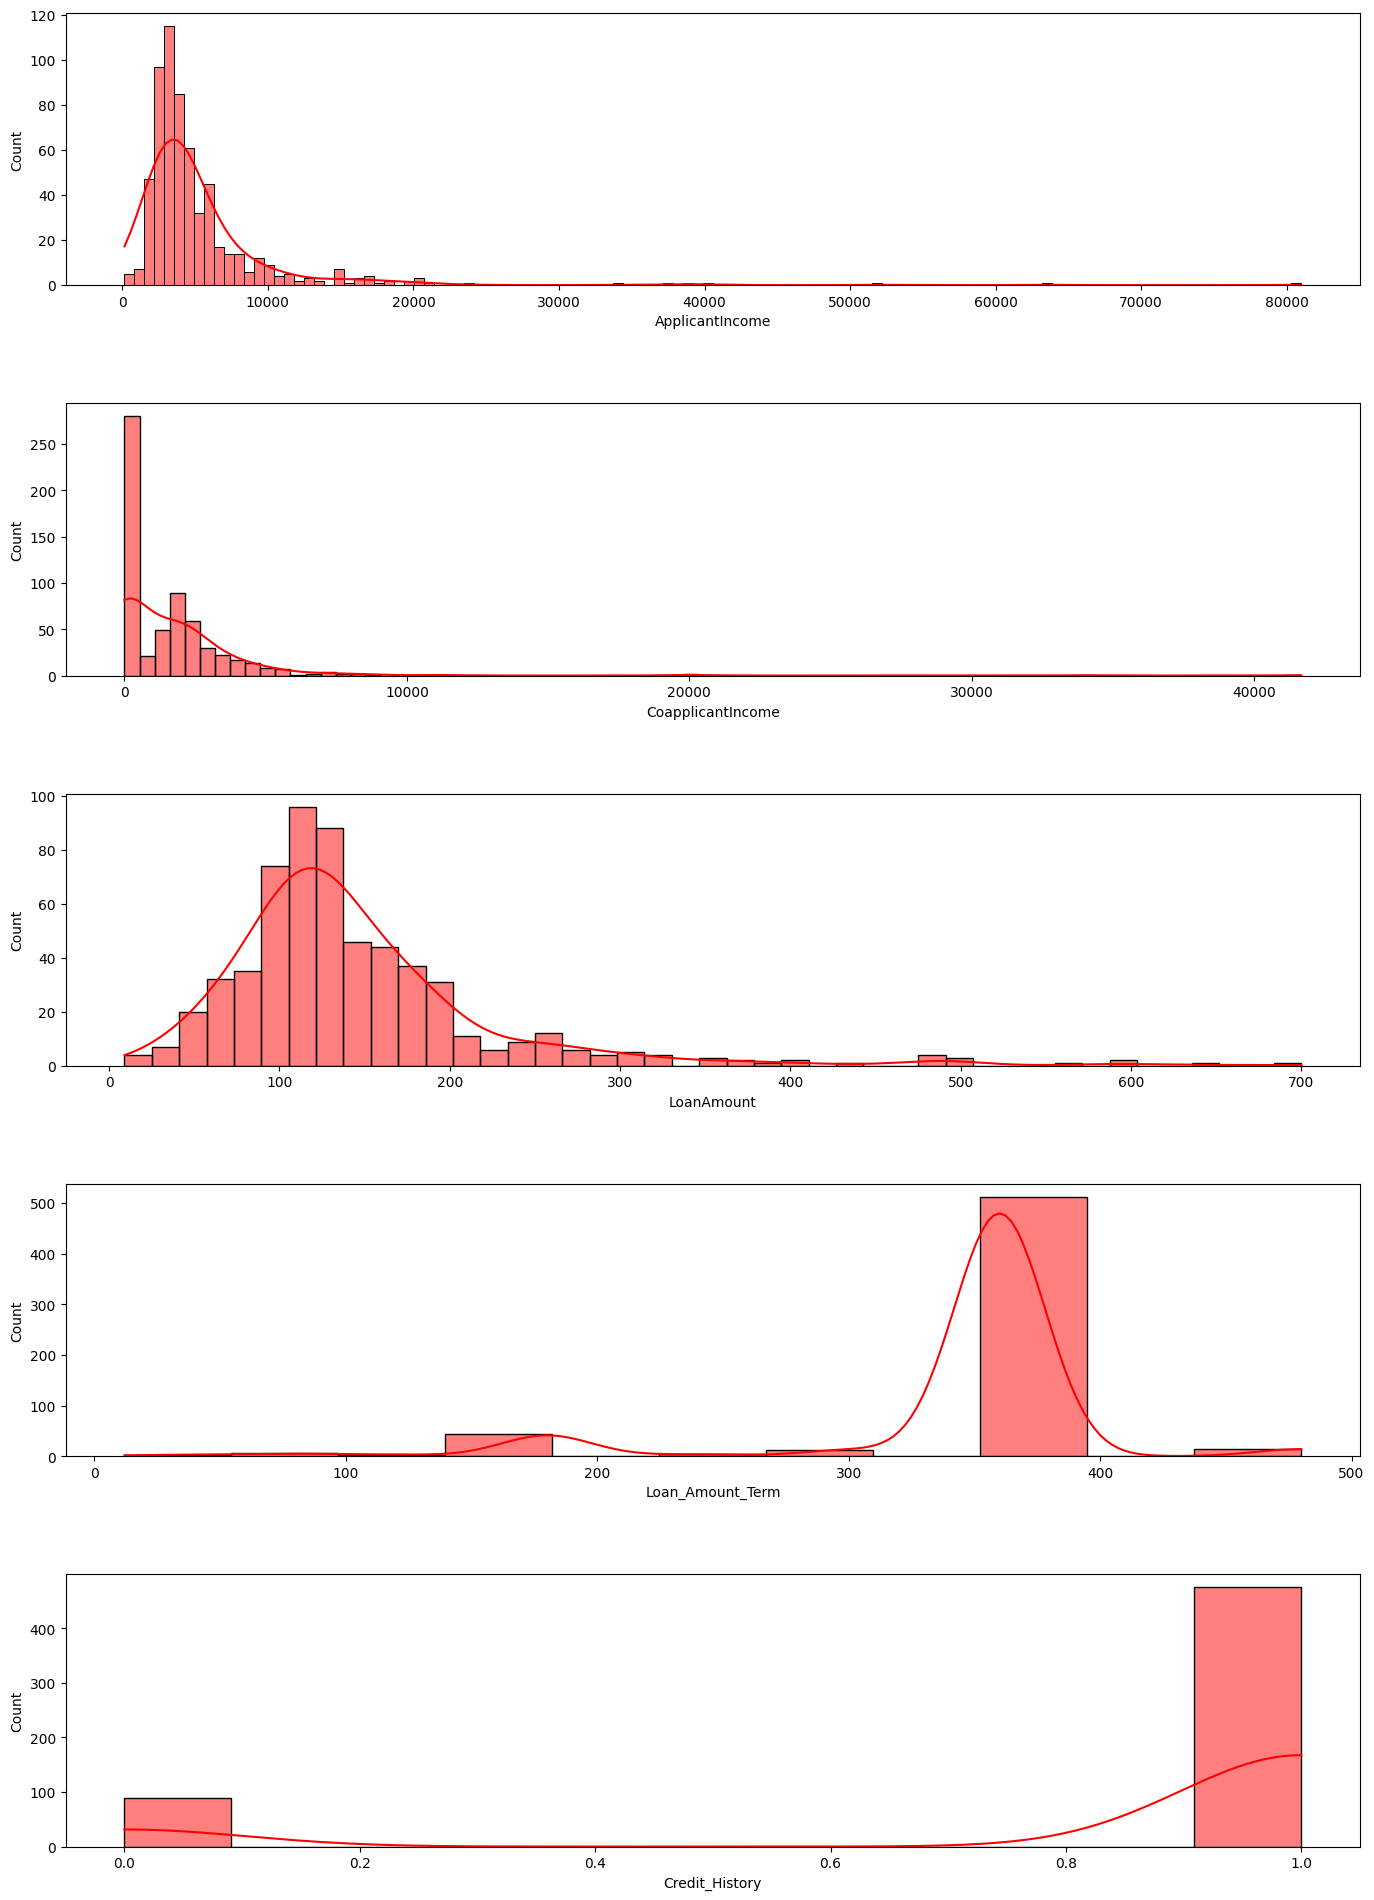

In [ ]:
# Skew and Kurtosi of the numerical variable
# ==============================================================================
for i in num_var:
  skew = datatrain[i].skew()
  kurt = datatrain[i].kurt()
  print("*"*22,i ,"*"*22)
  print(f"It has a skew {round(skew,2)} and a Kurtosis {round(kurt,2)}")
# Distribution plot
# ==============================================================================
fig, axes = plt.subplots(5,1,figsize = (15,20))
for idx, i in enumerate(num_var):
  fig.tight_layout(pad=5.0)
  sns.histplot(datatrain[i], kde = True, color = "red", ax = axes[idx])

  We can be inferred from the above distribution plot that some of them are not normally distributed. We will try to become them to normal distribution in later sections in order to that our machine learning models performs  better.

# 6. Feature Engineering

## Handle  Missing Values

We will treat the missing values by considering the following:
   
    For numerical variables: imputation using mean or median

    For categorical variables: imputation using mode

### Treatment of Categorical  Missing Values

In [ ]:
# Categorical case
# ==============================================================================
for df in [datatrain, datatest]:
  for i in cat_var[0:-1]:
    df[i].fillna(df[i].mode()[0],inplace=True)


### Treatment of Numerical Missing Values

In [ ]:
# Numerical case
# ==============================================================================
for df in [datatrain, datatest]:
  for i in num_var:
    df[i].fillna(df[i].median(),inplace=True)

In [ ]:
# Checking the Null Values
# ==============================================================================
print("*"*19,"Null Values for Training Data", "*"*19)
print(datatrain.isnull().sum())
print("*"*20,"Null Values for Testing Data", "*"*20)
print(datatest.isnull().sum())

******************* Null Values for Training Data *******************
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
******************** Null Values for Testing Data ********************
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


## Log Transformation

One way to become a distribution plot into a normal distribution is to perform a log transformation. By taking the log transformation reduces the larger values, but  it does not affect the smaller values.



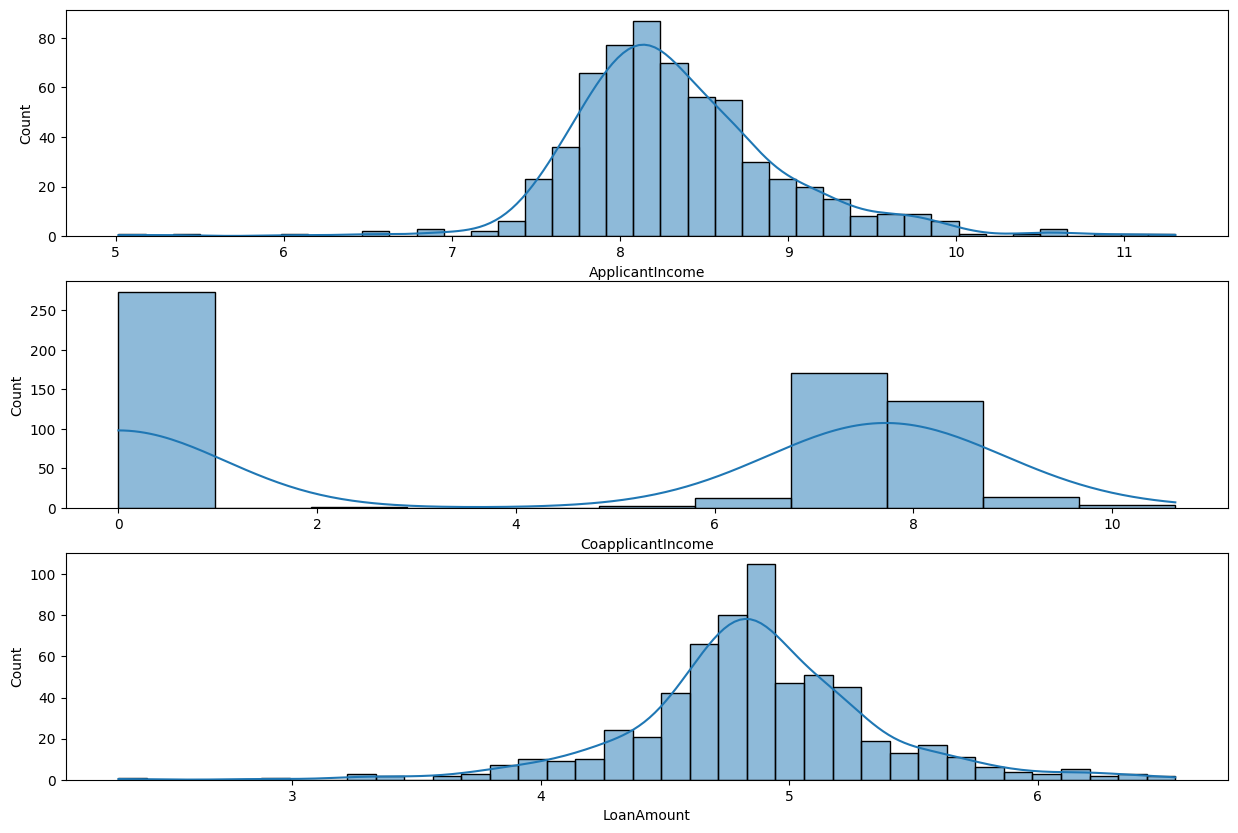

In [ ]:
# Taking the Log
# ==============================================================================
Log = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]
for df in [datatrain, datatest]:
  for i in Log:
    df[i] = np.log(df[i]+1)

fig, ax = plt.subplots(3,1, figsize=(15,10))
for idx, i in enumerate(Log):
  sns.histplot(datatrain[i], kde = True, ax = ax[idx])

## Label Encoder

In [ ]:
cat_var

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
Gen = {"Male": 0 ,"Female":1}
Mar = {"Yes": 0 , "No" : 1 }
Dep = {"0": 0 , "1": 1 , "2":2 , "3+" : 3}
Edu = {"Graduate": 1, "Not Graduate" : 0}
SeEm = {"No" : 1, "Yes" : 0 }
PoAr= {"Urban" : 2, "Semiurban" : 1, "Rural" : 0}
for df in [datatrain, datatest]:
  df["Gender"] = df["Gender"].map(Gen)
  df["Married"] = df["Married"].map(Mar)
  df["Dependents"] = df["Dependents"].map(Dep)
  df["Education"] = df["Education"].map(Edu)
  df["Self_Employed"] = df["Self_Employed"].map(SeEm)
  df["Property_Area"] = df["Property_Area"].map(PoAr)


In [ ]:
datatrain['Loan_Status'].replace('N', 0,inplace=True)
datatrain['Loan_Status'].replace('Y', 1,inplace=True)

## 3.4 CorrelationPlot

`Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). Types of Correlation`

*   `Perfect Positive Correlation  1`
*   `High Positive Correlation 0.9`
*   `Low Positive Correlation 0.5 `
*   `No correlation 0`
*   `Low Negative Correlation -0.5`
*   `High Negative Correlation -0.9`
*   `Perfect Negative Correlation -1`

<Axes: >

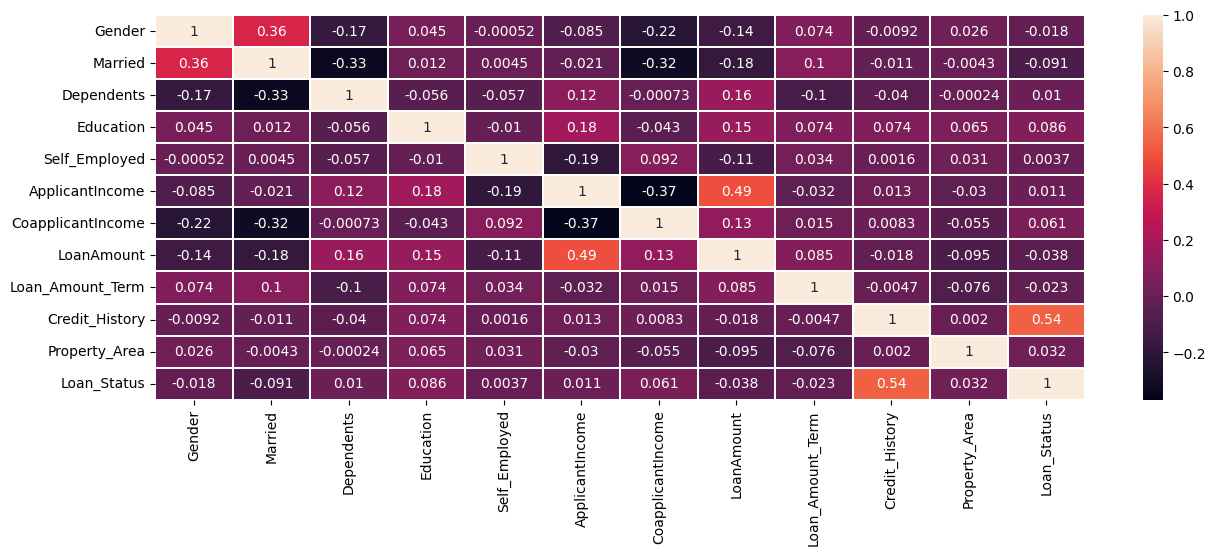

In [ ]:
plt.subplots(figsize=(15, 5))
sns.heatmap(datatrain.corr(), linewidths=.1, annot=True)

Summary of data visualization

*   


## 4.2 Splitting data
The goal of this work is to predict who client can acquire a loan and who can not, so we need to split the data into inputs(independent variable)  ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g','island', 'sex'] and  output(dependent variable) ['species']

In [ ]:
X = datatrain.drop(["Loan_Status"], axis =1)
y = datatrain["Loan_Status"]

# 4.3 Binning Data

In [ ]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

NameError: ignored

## 4.4 Find outliers

In [ ]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 1.5)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

##4.5 Label Encoding
As we can see labels are categorical. The most of estimator does not accept string labels. We need to use LabelEncoder to transform them into numbers.

For species: 'Adelie' correspond to 0, 'Chinstrap' correspond to 1, and 'Gentoo' correspond to 2
For Islands : Torgersen correspond to 2 , Dreams corresponds to 1, and Biscoe corresponds to 0.
For Sex: Male corresponds to 0 and Female corresponds to 1.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

## 4.6 Standardizating Data

When we analyze data, we often deal with datasets whose features vary in magnitude and units. For example, variables such as "cpu freq"  and "battery" drastically differ. So that by applying machine learning techniques to these variables, the algorithm will consider the variable "battery" more dominant than "cpu freq"  due to their different magnitudes. A way to avoid this conflict is to standardize said variables.
To make uniform these variables, we need to import the Standard_Scalar library, which has as its objective to standardize said variables such that each variable contributes equally to our analysis.

In [ ]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

# 7.  Machine Learning Models

##  7.1  Supervised Learning

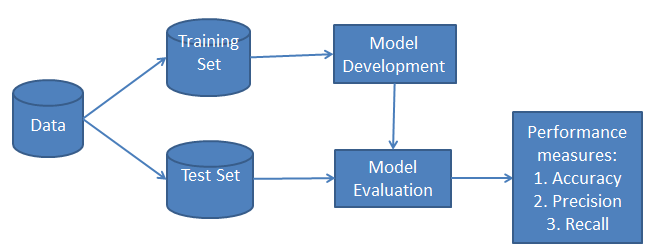

Representación de una red neuronal feed-forward (single-layer perceptron). Fuente: Computer Age Statistical Inference 2016

In [ ]:
from sklearn.model_selection import train_test_split

#If we use any integer value for random_state then it will produce the same result for an integer value.
#If we change the value of random_state, then only the result will be different.
#if we write none, it will produce different results in every execution.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
83        0        0           0          1              1         8.699681   
90        0        0           0          1              1         7.992607   
227       0        0           2          1              1         8.740497   
482       0        0           0          1              1         7.642044   
464       0        1           0          1              1         8.334952   
..      ...      ...         ...        ...            ...              ...   
71        0        0           2          0              0         7.536897   
106       0        0           2          1              1         9.342946   
270       1        1           0          1              1         8.082711   
435       1        0           0          1              1         9.215129   
102       0        0           0          1              1         9.521568   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

**Other important concepts**

**a. Confusion matrix**
A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.
1. A good model is one which has high TP and TN rates, while low FP and FN rates.

**Understanding Confusion Matrix:**

The following 4 are the basic terminology which will help us in determining the metrics we are looking for.

    -True Positives (TP): when the actual value is Positive and predicted is also Positive.
    -True negatives (TN): when the actual value is Negative and prediction is also Negative.
    -False positives (FP): When the actual is negative but prediction is Positive. Also known as the Type 1 error
    -False negatives (FN): When the actual is Positive but the prediction is Negative. Also known as the Type 2 error

**b. Accuracy:**

Accuracy simply measures how often the classifier makes the correct prediction. It’s the ratio between the number of correct predictions and the total number of predictions.
acc= (TP+TN)/(TP+TN+FP+FN) = correct prediction/ total predictions

**c. Precision:**

It is a measure of correctness that is achieved in true prediction. In simple words, it tells us how many predictions are actually positive out of all the total positive predicted.

Precision = TP/(TP+FP) = prediction actually positive/ total predicted positive

Precision is defined as the ratio of the total number of correctly classified positive classes divided by the total number of predicted positive classes

**d. Recall:**

It is a measure of actual observations which are predicted correctly, i.e. how many observations of positive class are actually predicted as positive. It is also known as Sensitivity. Recall is a valid choice of evaluation metric when we want to capture as many positives as possible.

Recall = TP/ (TP+FN) = prediction actually positive/ total actual positive

**f. F-measure / F1-Score**

The F1 score is a number between 0 and 1 and is the harmonic mean of precision and recall. We use harmonic mean because it is not sensitive to extremely large values, unlike simple averages.
F1-score= Recall*Precision/(Recall+Precision)

###  5.1.1  Logistic Regression

`Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.`

`We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.`





###  5.1.2  Naïve Bayes Classification

`In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features. Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.`

<Axes: >

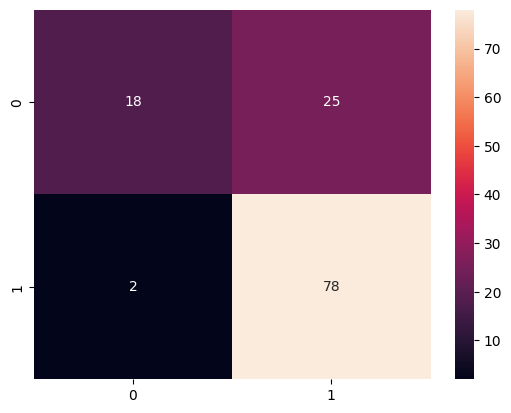

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)



#Confusion Matrix

sns.heatmap(cmNB, annot= True)

#### **Confusion Matrix for Naive**


In [ ]:
cmNB = confusion_matrix(y_test, predictNB)
accNB= accuracy_score(y_test,predictNB)
precisionNB=precision_score(y_test, predictNB, average= "micro")
recallNB =  recall_score(y_test, predictNB, average = "micro")
f1NB = f1_score(y_test,predictNB,average='micro')
print('Confusion matrix for Naive Bayes\n',cmNB)
print('accuracy_Naive Bayes: %.3f' %accNB)
print('precision_Naive Bayes: %.3f' %precisionNB)
print('recall_Naive Bayes: %.3f' %recallNB)
print('f1-score_Naive Bayes : %.3f' %f1NB)
sns.heatmap (cmNB, annot = True)

#### **Comparing the actual value test with the predicted value test**

In [ ]:
df= pd.DataFrame({"Actual Value": y_test, "Predicted Value": predictNB})
df

#### **Check for overfitting and underfitting**

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gaussian.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gaussian.score(X_test, y_test)))

Training set score: 0.8126
Test set score: 0.7805


**Report**:
The training-set accuracy score is 0.8476 while the test-set accuracy to be 0.8501. These two values are quite comparable. So, there is no question of overfitting.

### 5.1.3  K-Nearest Neighbour

`K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.`

`K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.`

`K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.`








#### Optimizing the Model

In [ ]:
#To optimize the model, we will find the best parameter for SVM using gridsearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [2,4,6,8,10,12]}
gs = GridSearchCV(KNeighborsClassifier(), params, cv=10, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

print('Score:',gs.best_score_,'\nParameters:', gs.best_params_)

best_classifier = gs.best_estimator_
best_classifier

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Score: 0.7292244897959184 
Parameters: {'n_neighbors': 10}


KNeighborsClassifier(n_neighbors=10)

#### The Best Model: n_neighbors=4

In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors=10)
modelKNN.fit(X_train, y_train)
predictKNN = modelKNN.predict(X_test)
accKNN=accuracy_score(y_test,predictKNN)
print(accKNN)

0.6666666666666666


#### Confusion Matrix for  KNN

In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors=4)
modelKNN.fit(X_train, y_train)
predictKNN = modelKNN.predict(X_test)
accKNN=accuracy_score(y_test,predictKNN)
print(accKNN)

0.6422764227642277


#### **Comparing the actual value test with the predicted value test**

In [ ]:
df= pd.DataFrame({"Actual Value": y_test, "Predicted Value": predictKNN})
df

#### **Checking Overfitting and Underfitting**

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(modelKNN.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(modelKNN.score(X_test, y_test)))

### 4.1.4  Support Vector Machine

`Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well`

`params = {'kernel': ['linear', 'poly', "RBF", "Sigmoid"], 'C': [10, 30, 50, 70, 80, 100], 'gamma': [1,0.1,0.01,0.001]}`

`C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimisation how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term.`

`Gamma: It defines how far influences the calculation of plausible line of separation.
when gamma is higher, nearby points will have high influence; low gamma means far away points also be considered to get the decision boundary.`



#### Optimizing the Model

In [ ]:
#To optimize the model, we will find the best parameters for SVM using gridsearchCV
from sklearn.svm import  SVC
from sklearn.model_selection import GridSearchCV

params = {'kernel': ['linear', 'poly', 'rbf'], 'C':[10, 30, 50, 70, 80, 100]}
gs = GridSearchCV(SVC(), params, cv=10, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

print('Score:',gs.best_score_,'\nParameters:', gs.best_params_)

best_classifier = gs.best_estimator_
best_classifier

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Score: 0.8167755102040818 
Parameters: {'C': 50, 'kernel': 'linear'}


SVC(C=50, kernel='linear')

#### The Best Model : C=30 and Kernel="linear"

In [ ]:
from sklearn.svm import  SVC
modelSVM=SVC(C=50, kernel = "linear")
modelSVM.fit(X_train, y_train)
predictSVM = modelSVM.predict(X_test)
accSVM = accuracy_score(y_test,predictSVM)
accSVM

0.7886178861788617

#### Confunsion Matrix for SVC

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictSVM))

cmSVM = confusion_matrix(y_test, predictSVM)
sns.heatmap (cmSVM, annot = True)

#### **Comparing the actual value test with the predicted value test**

In [ ]:
df= pd.DataFrame({"Actual Value": y_test, "Predicted Value": predictSVM})
df

#### **Check overfitting and underfitting for SVM**

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(modelSVM.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(modelSVM.score(X_test, y_test)))

### 4.1.5 Decision Tree

`A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.`

### Optimizing the Model

In [ ]:
#To optimize the model, we will find the best parameters for Decision Tree using gridsearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['entropy', 'gini'], 'max_depth': [5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1,3, 4, 5, 7, 9]}
gs = GridSearchCV(DecisionTreeClassifier(), params, cv=10, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

print('Score:',gs.best_score_,'\nParameters:', gs.best_params_)

best_classifier = gs.best_estimator_
best_classifier

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Score: 0.8146122448979594 
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

#### The Best Model: criterion = "gini",  max_depth = 9, min_samples_leaf= 1

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelDTC = DecisionTreeClassifier(criterion = "gini", max_depth= 5, min_samples_leaf=4)
modelDTC.fit(X_train,y_train)
predictDTC = modelDTC.predict(X_test)
accDTC = accuracy_score(y_test,predictDTC)
print(accDTC)

0.7398373983739838


#### Drawing the Tree

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(modelDTC, feature_names=data.columns, filled=True)
plt.show()

Matrix Confusion for Decision Tree

In [ ]:
from sklearn.metrics import classification_report # metricas de validação

print(classification_report(y_test, predictDTC))
cmDTC = confusion_matrix(y_test, predictDTC)
sns.heatmap (cmDTC, annot = True)

#### **Comparing the actual value test with the predicted value test**

In [ ]:
df= pd.DataFrame({"Actual Value": y_test, "Predicted Value": predictDTC})
df

#### **Check overfitting and underfitting for DTC**

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(modelDTC.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(modelDTC.score(X_test, y_test)))

### 4.1.6  Random Forest

`Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.`

`A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.`

## 4.2  Unsupervised Learning

### 4.2.1  K-Means Clustering

**Elbow Method**

This is probably the most well-known method for determining the optimal number of clusters. It is also a bit naive in its approach.
**Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.**

Within-Cluster-Sum of Squared Errors sounds a bit complex. Let’s break it down:

* The Squared Error for each point is the square of the distance of the point from its representation i.e. its predicted cluster center.
* The WSS score is the sum of these Squared Errors for all the points.
Any distance metric like the Euclidean Distance or the Manhattan Distance can be used.
* Let us implement this in Python using the sklearn library and our own function for calculating WSS for a range of values for k

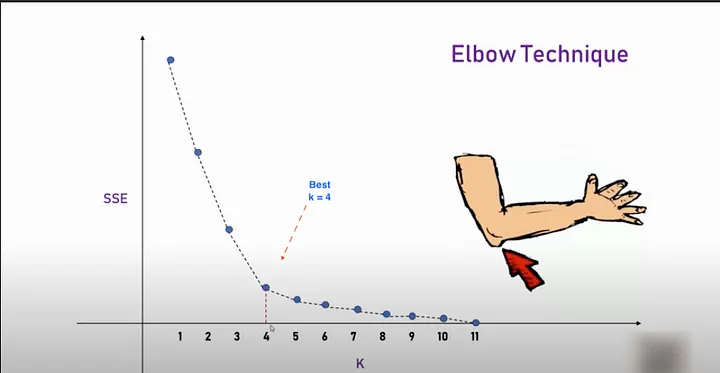

In [ ]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
df = data.drop(["D"], axis=1)
ssd=[]
for k in range(2,11):
  kmean=KMeans(n_clusters=k).fit(df)
  ssd.append([k,kmean.inertia_])

#to graphic
plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1])
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


**The Silhouette Method**

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

The Silhouette score can be easily calculated in Python using the metrics module of the sklearn library.

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster

SK = range(2,13)
sil_score = []

for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df).labels_
    score = metrics.silhouette_score(df,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df,labels,metric="euclidean",sample_size=1000,random_state=200)))
sns.lineplot(x=range(2,13), y= sil_score)

NameError: ignored

**K-means**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
x = data.iloc[:, [0, 1, 2 , 3]].values
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)
#print the cluster
print("Print the cluster", kmeans.cluster_centers_)
# Visualising the clusters "Sepal Length -Sepal Width"
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

# 6. Cross- Validation: K-fold

In [ ]:
from sklearn.model_selection import cross_val_score #import library for k-fold

# K-fold (k=5)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Results linha8
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


[0.62011173, 0.45810056, 0.46067416, 0.52247191, 0.68361582]

A função cross_val_score tem como resultado de saída uma lista com os scores de cada iteração feita com cada parte(fold) do método k-fold cross validation. A partir dos resultados registrados (linha 5) podemos perceber como a escolha dos dados de treino e teste, mesmo de maneira aleatória, influenciam na avaliação do desempenho do modelo. Tivemos um melhor resultado de 0.68 e um pior resultado de 0.45, uma diferença considerável se tratando de avaliação de modelos.


Podemos fazer uma média e também o desvio padrão dos resultados para análise (linha 8) e desempenho geral do modelo:

Accuracy: 0.55 (+/- 0.18)

# 5. Results and Conclusions

The aim of this project was predict the type of specie of penguins from their  main characteristics, in order to do that we have used 4 models of classification:  Naive Bayes, K-Nearnest Neighbor, Support Vector Machine and Decision Tree. The report of each of them is as follow


* Naive Bayes Clasification has an accuracy of 0.896.
* K-Nearest Neighbour has an accuracy of  0.98, where its parameters is  k_neighbour=4
* Support Vector Machine has an accuracy  of 1, where the best parameter are C= 30 and kernel = Linear, these parameters were found using gridsearchCV.
* Decision Tree Classifier has an accuracy  of 0.985, where the best parameter are criterion = "gini", max_depth= 9, min_samples_leaf=1, these parameters were found using gridsearchCV.
* The model that predicts better is Support Vector Machine Classifier.


# 6.  References

https://scikit-learn.org/0.21/_downloads/scikit-learn-docs.pdf